In [1]:
#import zipfile
#with zipfile.ZipFile("/home/dsc/Downloads/CMAPSSData.zip", 'r') as zip_ref:
#    zip_ref.extractall("/home/dsc/Downloads/CMAPSSData")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset_1 = pd.read_csv('/home/dsc/Downloads/CMAPSSData/train_FD001.txt', sep=" ", header=None)

In [9]:
dataset_1.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [10]:
dataset_1 = dataset_1.dropna(axis=1)

In [11]:
dataset_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [23]:
list_units_1 = 3
operational_list = []
for n in range(1,list_units_1+1):
    operational = "operarional_setting_" + str(n)
    operational_list.append(operational)
 

In [24]:
list_units_2 = 21
sensor_measurement_list = []
for n in range(1,list_units_2+1):
    sensor = "sensor_measurement_" + str(n)
    sensor_measurement_list.append(sensor)
 

In [25]:
dataset_1.columns = ["ID", "Cycle"] + operational_list + sensor_measurement_list

In [34]:
dataset_1

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_12,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [43]:
# Definition of RUL in terms of cycles
# RUL = nº of cycles remaining till the end of life

max_cycle_dataset_1 = dataset_1.groupby(["ID"])["Cycle"].max().reset_index()
max_cycle_dataset_1 = max_cycle_dataset_1.rename(columns={"Cycle":"Max_cycle"})

In [56]:
max_cycle_dataset_1

,ID,Max_cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


In [113]:
df1 = dataset_1.merge(max_cycle_dataset_1, how="inner", on="ID")
df1["RUL"] = df1["Max_cycle"] - df1["Cycle"]

In [114]:
df1 = df1.drop(["Max_cycle"],axis=1)

In [115]:
df1.head()

,ID,Cycle,operarional_setting_1,operarional_setting_2,operarional_setting_3,sensor_measurement_1,sensor_measurement_2,sensor_measurement_3,sensor_measurement_4,sensor_measurement_5,...,sensor_measurement_13,sensor_measurement_14,sensor_measurement_15,sensor_measurement_16,sensor_measurement_17,sensor_measurement_18,sensor_measurement_19,sensor_measurement_20,sensor_measurement_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [74]:
import seaborn as sns

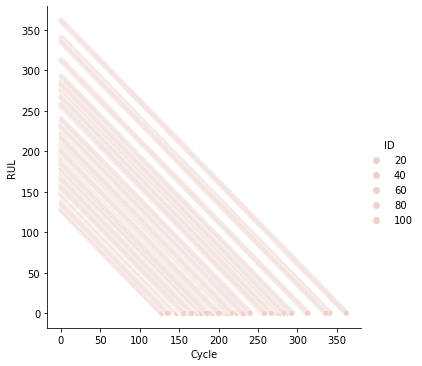

In [89]:
sns.relplot(data=df1,x='Cycle',y='RUL',hue='ID', hue_norm=(100,200))

In [213]:
X_1 = df1[df1["ID"]==1]

In [214]:
X_1 = X_1.drop(["ID"], axis=1)

In [215]:
X = X_1[X_1.columns[:-1]]

In [216]:
y = X_1[X_1.columns[-1:]]

In [217]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [220]:
lr = LinearRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
mean_squared_error(y_test, preds)

1.602965359409096e-27

In [221]:
from sklearn.metrics import mean_squared_error

print(np.sqrt(mean_squared_error(y_test, preds)))

4.0037049833986217e-14


ValueError: x and y must have same first dimension, but have shapes (192,) and (48, 1)

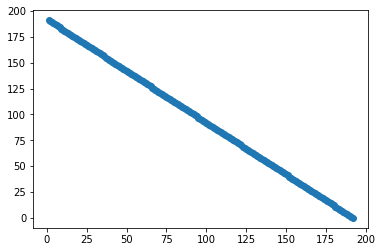

In [222]:
fig,ax = plt.subplots(1,1)
ax.scatter(X["Cycle"], y["RUL"])
ax.plot(X["Cycle"], preds, "r") 